# Summary Statistics and Diagnostics

Dalam bab ini, Anda akan mendapatkan pemahaman yang lebih dalam tentang data time series dengan menghitung statistik ringkasan dan memplot tampilan agregat data Anda.

## Clean your time series data

### Find missing values

Di bidang Ilmu Data, adalah umum untuk menemukan kumpulan data dengan nilai yang hilang. Ini terutama benar dalam kasus data time series, di mana nilai yang hilang dapat terjadi jika pengukuran gagal mencatat nilai pada cap waktu tertentu.

In [11]:
import pandas as pd

co2_levels = pd.read_csv('datasets/ch2_co2_levels.csv')
co2_levels.head()

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [12]:
# Convert to datetime
co2_levels['datestamp'] = pd.to_datetime(co2_levels['datestamp'])

# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


### Handle missing values

Untuk mengganti nilai yang hilang dalam data time series, Anda dapat menggunakan perintah:

`df = df.fillna(method="ffill")`

di mana argumen menentukan jenis metode yang ingin Anda gunakan. Misalnya, menentukan `bfill` (backfilling) akan mengisi nilai yang hilang menggunakan pengamatan yang valid berikutnya, sementara `ffill` (forward-filling) mengisi nilai yang hilang menggunakan pengamatan terakhir yang valid.

Ingat dari latihan sebelumnya bahwa `co2_levels` memiliki 59 nilai yang hilang.

In [13]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


## Plot aggregates of your data

### Moving averages

* Dalam bidang analisis time series, moving averages (pergerakan rata-rata) dapat digunakan untuk berbagai tujuan:
  * menghaluskan fluktuasi jangka pendek
  * menghapus outliers
  * menyoroti tren atau siklus jangka panjang.

### Display rolling averages

Dimungkinkan juga untuk memvisualisasikan rolling average dari nilai-nilai dalam time series Anda. Ini sama dengan "menghaluskan" data Anda, dan bisa sangat berguna ketika time series Anda mengandung banyak noise atau outlier. Contoh untuk mendapatkan rolling average dari time series dengan menggunakan perintah:

`df_mean = df.rolling(window=12).mean()`

Parameter `window` harus diatur sesuai dengan perincian (*granularity*) time series Anda. Misalnya, jika time series Anda berisi data harian dan Anda mencari nilai bergulir lebih dari setahun, Anda harus menentukan parameter ke `window=365`. Selain itu, mudah untuk mendapatkan nilai bergulir untuk metrik lainnya, seperti standar deviasi (`.std()`) atau varians (`.var()`).

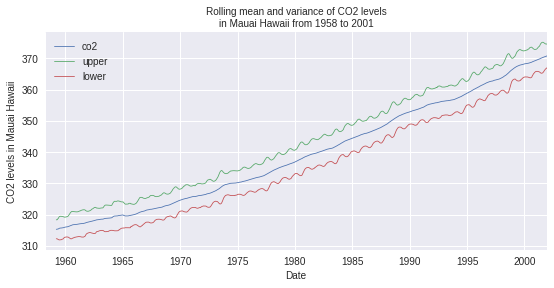

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=10, figsize=(9, 4))

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

**Catatan** : Menampilkan rolling mean dan standar deviasi data Anda memungkinkan untuk mendapatkan tampilan data Anda yang lebih kompak.

### Display aggregated values

Terkadang Anda mungkin diminta untuk menampilkan data Anda dalam bentuk yang lebih teragregasi. Misalnya, data `co2_levels` berisi data mingguan, tetapi Anda mungkin perlu menampilkan nilainya yang dikumpulkan berdasarkan bulan dalam satu tahun. Dalam kumpulan data seperti DataFrame `co2_levels` di mana indeks adalah tipe `datetime`, Anda bisa mengekstrak tahun dari setiap tanggal dalam indeks:

```python
# extract of the year in each dates of the df DataFrame
index_year = df.index.year
```

Untuk mengekstrak bulan atau hari dari tanggal dalam indeks, Anda dapat menggunakan `df.index.month` dan `df.index.day`. Anda kemudian dapat menggunakan tahun yang diekstraksi dari setiap indeks di `co2_levels` dan fungsi `groupby` untuk menghitung tingkat rata-rata CO2 berdasarkan tahun:

```python
df_by_year = df.groupby(index_year).mean()
```

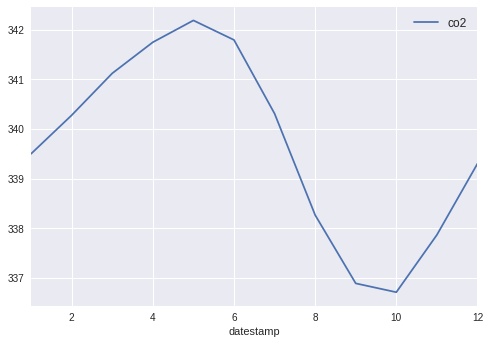

In [26]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=10)

# Specify the fontsize on the legend
plt.legend(fontsize=12)

# Show plot
plt.show()

**Catatan** : Dengan memplot data rata-rata level CO2 untuk setiap bulan, Anda dapat melihat bagaimana level CO2 tinggi selama bulan-bulan musim panas, dan lebih rendah selama bulan-bulan musim dingin. Ini karena peningkatan sinar matahari dan produksi CO2 oleh tanaman!

## Summarize the values in your time series data

### Obtaining numerical summaries of your data

* Berapa nilai rata-rata dari data ini?
* Berapa nilai maksimum yang diamati dalam time series ini?

### Compute numerical summaries

Metode `.describe()` secara otomatis menghitung statistik kunci dari semua kolom numerik di DataFrame Anda.

In [37]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels['co2'].min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels['co2'].max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


### Boxplots and Histograms

Boxplots mewakili rendisi grafis dari minimum, median, kuartil, dan maksimum data Anda. Anda dapat membuat boxplot dengan memanggil metode `.boxplot()` pada DataFrame.

Metode lain untuk menghasilkan ringkasan visual adalah dengan memanfaatkan histogram, yang memungkinkan Anda untuk memeriksa data dan mengungkap distribusi yang mendasarinya, serta keberadaan outliers dan penyebaran keseluruhan. Contoh cara membuat histogram ditunjukkan di bawah ini:

```python
ax = co2_levels.plot(kind='hist', bins=100)
```

Di sini, kita menetapkan argumen `kind` menjadi `'hist'`. Selain itu, kita juga menambahkan parameter `bins=100`, yang menentukan berapa banyak interval (yaitu `bins`).

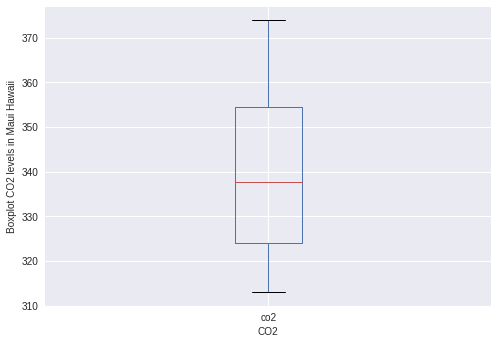

In [39]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.show()

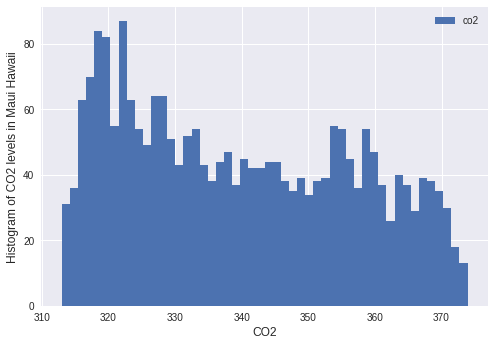

In [42]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=10)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=12)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=12)
plt.legend(fontsize=10)
plt.show()

**Catatan** : Mudah-mudahan, ini menunjukkan bagaimana boxplot bisa menjadi alternatif grafis yang baik untuk ringkasan numerik.

### Density plots

Dalam praktiknya, histogram dapat menjadi metode di bawah standar untuk menilai distribusi data Anda karena mereka dapat sangat dipengaruhi oleh jumlah `bins` yang telah ditentukan. Alih-alih, kernel density plots merupakan cara yang lebih efektif untuk melihat distribusi data Anda. Contoh cara menghasilkan density plot ditunjukkan di bawah ini:

```python
ax = df.plot(kind='density', linewidth=2)
```

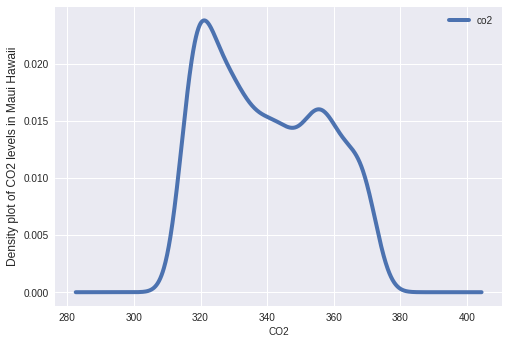

In [49]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=10)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=12)

plt.show()